# Stock Price Prediction using Time series

Loading the data .
The tickerDf dataframe will contain the historical data for Apple from 2000 to 2023.

In [ ]:
import yfinance as yf

# Define the ticker symbol
tickerSymbol = 'AAPL'

# Get data for this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2010-1-1', end='2023-1-1')

# See the data
print(tickerDf)


                                 Open        High         Low       Close  \
Date                                                                        
2010-01-04 00:00:00-05:00    6.469951    6.502387    6.438121    6.487533   
2010-01-05 00:00:00-05:00    6.505420    6.535431    6.464495    6.498751   
2010-01-06 00:00:00-05:00    6.498750    6.524518    6.388710    6.395379   
2010-01-07 00:00:00-05:00    6.419024    6.426603    6.337176    6.383556   
2010-01-08 00:00:00-05:00    6.375069    6.426603    6.337480    6.425996   
...                               ...         ...         ...         ...   
2022-12-23 00:00:00-05:00  130.363811  131.857438  129.089250  131.299820   
2022-12-27 00:00:00-05:00  130.821856  130.851727  128.173153  129.477585   
2022-12-28 00:00:00-05:00  129.119115  130.473338  125.335264  125.504539   
2022-12-29 00:00:00-05:00  127.446252  129.925671  127.187362  129.059372   
2022-12-30 00:00:00-05:00  127.864474  129.397925  126.888634  129.378006   

In [ ]:
apple_stock_data = tickerDf
apple_stock_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 00:00:00-05:00,6.469951,6.502387,6.438121,6.487533,493729600,0.0,0.0
2010-01-05 00:00:00-05:00,6.505420,6.535431,6.464495,6.498751,601904800,0.0,0.0
2010-01-06 00:00:00-05:00,6.498750,6.524518,6.388710,6.395379,552160000,0.0,0.0
2010-01-07 00:00:00-05:00,6.419024,6.426603,6.337176,6.383556,477131200,0.0,0.0
2010-01-08 00:00:00-05:00,6.375069,6.426603,6.337480,6.425996,447610800,0.0,0.0


The dataset contains the following columns for Apple's stock:

Open: The opening price of the stock on a given day.  
High: The highest price of the stock on that day.  
Low: The lowest price of the stock on that day.  
Close: The closing price of the stock on that day.  
Volume: The number of shares traded on that day.  
Dividends: Dividends paid on that day.  
Stock Splits: The stock split ratio on that day, if applicable.   
For the purpose of time series forecasting, we'll typically focus on the Close prices.

In [ ]:
apple_stock_data.index

DatetimeIndex(['2010-01-04 00:00:00-05:00', '2010-01-05 00:00:00-05:00',
               '2010-01-06 00:00:00-05:00', '2010-01-07 00:00:00-05:00',
               '2010-01-08 00:00:00-05:00', '2010-01-11 00:00:00-05:00',
               '2010-01-12 00:00:00-05:00', '2010-01-13 00:00:00-05:00',
               '2010-01-14 00:00:00-05:00', '2010-01-15 00:00:00-05:00',
               ...
               '2022-12-16 00:00:00-05:00', '2022-12-19 00:00:00-05:00',
               '2022-12-20 00:00:00-05:00', '2022-12-21 00:00:00-05:00',
               '2022-12-22 00:00:00-05:00', '2022-12-23 00:00:00-05:00',
               '2022-12-27 00:00:00-05:00', '2022-12-28 00:00:00-05:00',
               '2022-12-29 00:00:00-05:00', '2022-12-30 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=3272, freq=None)

# EDA (Exploratory Data Analysis)

For our EDA on the Apple stock data, we'll:  

Visualize the Close prices over time to observe trends and patterns.  
Check for missing values.  
Visualize the distribution of the Close prices.  
Analyze the volume of trades over time.  
Examine seasonality and trends using decomposition.  
Plot the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) to infer potential parameters for the ARIMA model.  

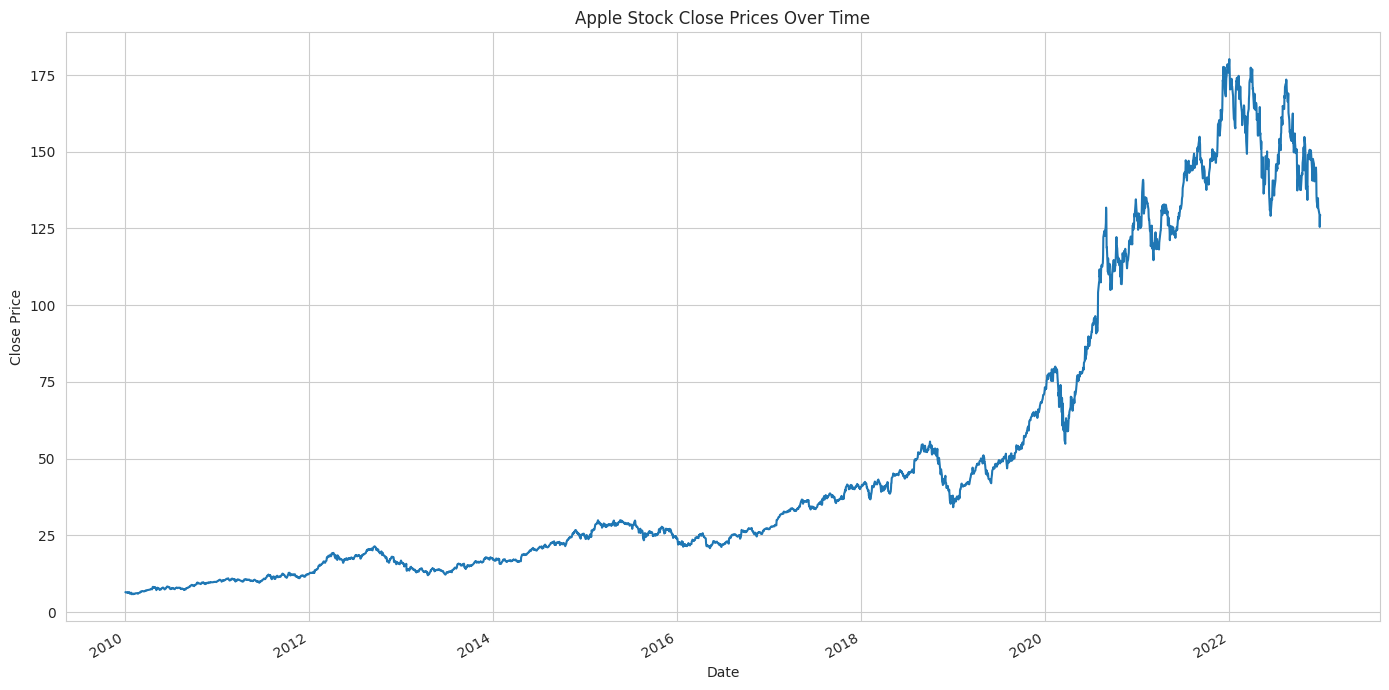

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Plotting the Close prices over time
plt.figure(figsize=(14, 7))
apple_stock_data['Close'].plot()
plt.title('Apple Stock Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.tight_layout()
plt.show()

The plot shows the close prices of Apple stock over time. We can observe a few insights:

Trending Upward: The stock price has generally trended upward over the years, with certain periods of rapid growth and some periods of consolidation or minor declines.  
Volatility: There are periods of noticeable volatility, where the stock price fluctuates significantly.  
Splits: The stock may have undergone splits, which can be inferred from the sharp drops in price followed by rapid recoveries.  

In [ ]:
missing_values = apple_stock_data.isnull().sum()

missing_values

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

let's visualize the distribution of the Close prices. This will give us an idea of the spread and central tendency of the stock prices.

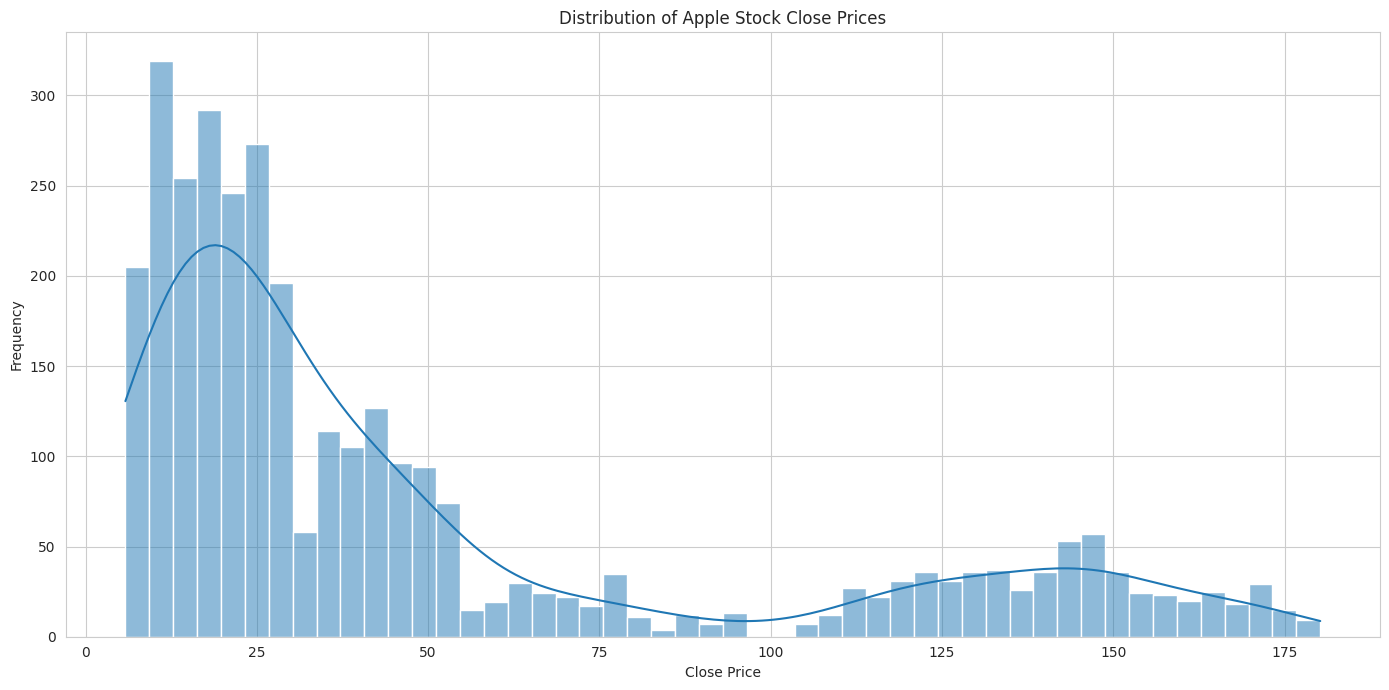

In [ ]:
plt.figure(figsize=(14, 7))
sns.histplot(apple_stock_data['Close'], bins=50, kde=True)
plt.title('Distribution of Apple Stock Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The distribution plot provides insights into the spread of the close prices:

Multi-modal Distribution: The distribution appears to be multi-modal, suggesting that the stock price has had distinct periods where it traded within certain ranges.  
Shifts Over Time: The presence of multiple peaks indicates that the stock price has shifted through several ranges over the years.   This is consistent with our earlier observation of the stock trending upwards over time.

Analyze the volume of trades over time.   
This can give insights into periods of high buying/selling activity.

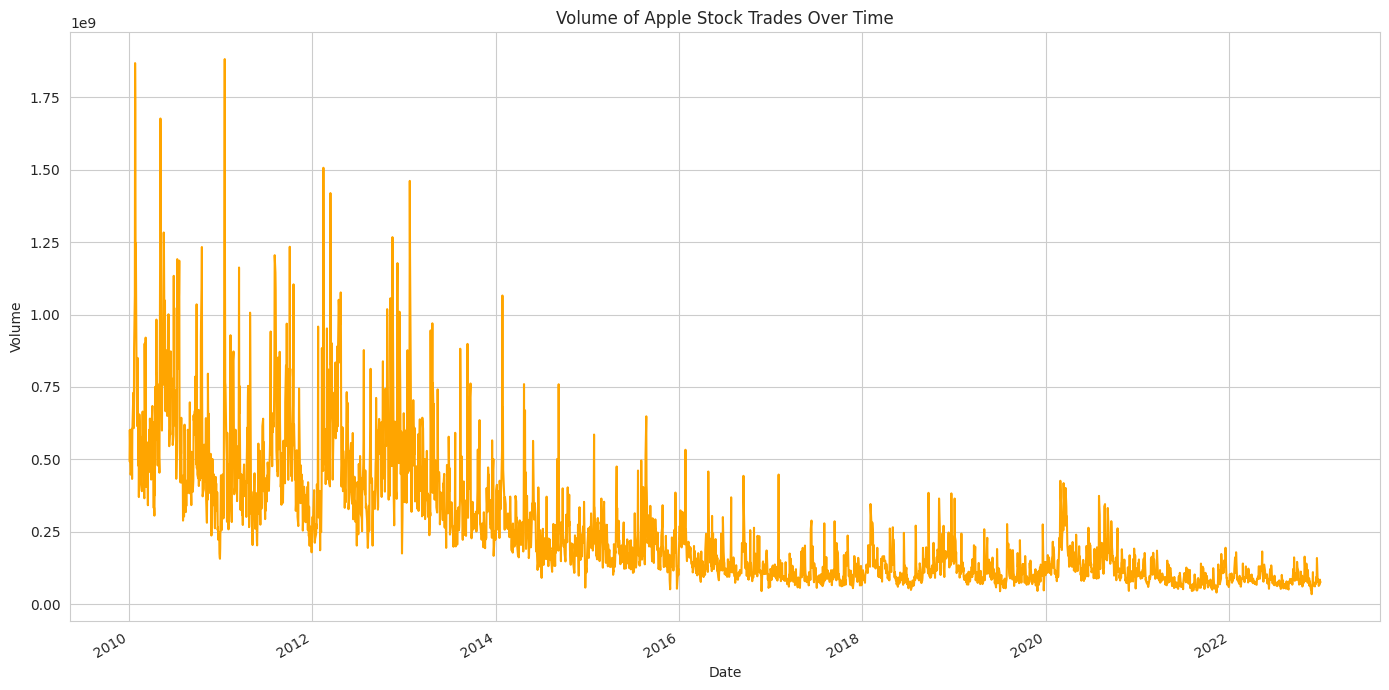

In [ ]:
plt.figure(figsize=(14, 7))
apple_stock_data['Volume'].plot(color='orange')
plt.title('Volume of Apple Stock Trades Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()

The volume plot provides insights into the trading activity of Apple's stock:

Fluctuating Volume: The volume of trades fluctuates over time, with certain periods experiencing very high trading volumes.  
Decline in Volume: Over the long term, there seems to be a decline in the volume of trades.     
This could be due to various factors, including stock splits, which increase the number of shares available and can dilute the trading volume.

Examine the seasonality, trend, and residuals of the Close prices using decomposition. This will help us understand if there are any regular patterns (like yearly or monthly patterns) in the data.

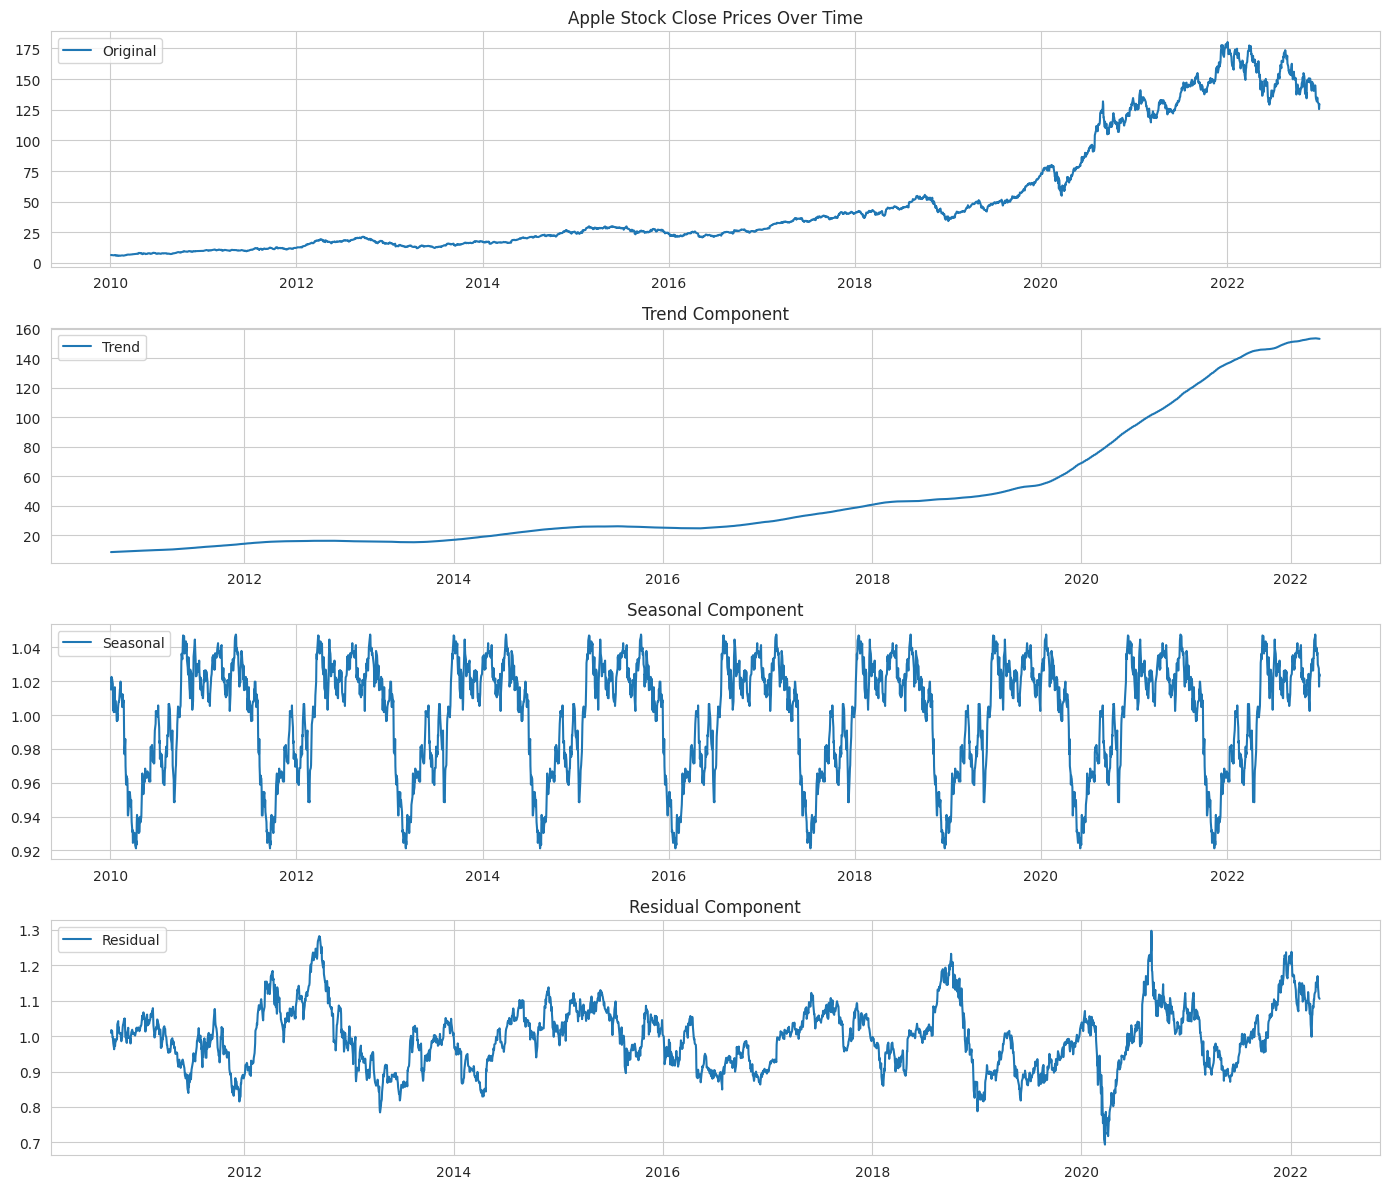

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the Close prices to observe trend, seasonality, and residuals
decomposition = seasonal_decompose(apple_stock_data['Close'], model='multiplicative', period = 365)

# Plotting the decomposition
plt.figure(figsize=(14, 12))

# Original
plt.subplot(4, 1, 1)
plt.plot(apple_stock_data['Close'], label='Original')
plt.legend(loc='upper left')
plt.title('Apple Stock Close Prices Over Time')

# Trend
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

# Seasonal
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

# Residual
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()


The decomposition provides us with the following insights:

Trend Component: The trend closely follows our original data, reflecting the overall upward trajectory of Apple's stock price over the years.  
Seasonal Component: There doesn't seem to be a strong yearly seasonality in the stock price. The fluctuations in the seasonal component appear to be minor and may not have a significant impact on the stock price.  
Residual Component: The residuals (or noise) showcase the variations not captured by the trend and seasonal components. These residuals might contain other patterns or might simply be random noise.  

For our EDA, let's plot the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF).   
These plots are essential for determining the parameters for ARIMA models. They can provide insights into the lagged terms that have a correlation with the current term.  

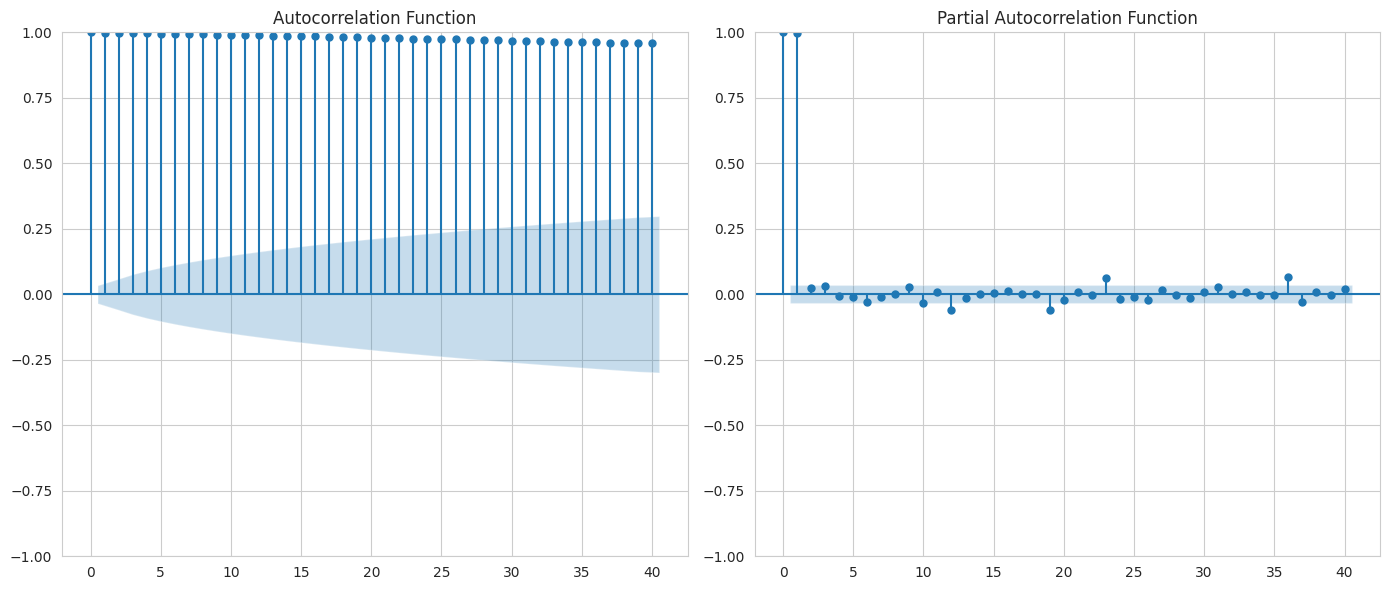

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(14, 6))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(apple_stock_data['Close'], lags=40, ax=plt.gca())
plt.title('Autocorrelation Function')

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(apple_stock_data['Close'], lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

The Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots provide the following insights:   

ACF: The ACF shows a gradual decay, which suggests that there's a correlation between the current term and several past terms.   
This can be indicative of the MA (Moving Average) component of an ARIMA model.  
PACF: The PACF has a sharp cutoff after the first few lags, which suggests that the correlation with the current term is significant for only a few past terms.   
This can be indicative of the AR (AutoRegressive) component of an ARIMA model.  

These plots will be useful when we decide on the p (order of AR) and q (order of MA) terms for an ARIMA model.  

With this, we have concluded our EDA on the Apple stock data. We've visualized the stock's closing prices, checked for missing values, analyzed the volume of trades, decomposed the time series, and plotted ACF and PACF for insights into potential ARIMA parameters.

# Modelling

For modeling, we'll focus on two approaches:

ARIMA (AutoRegressive Integrated Moving Average) Model: This is a classic method for time series forecasting. The model requires three parameters:

p: Order of the autoregressive (AR) term.
d: Degree of differencing.
q: Order of the moving average (MA) term.

The ACF and PACF plots from our EDA can help inform our choices for
p and q.

# ARIMA ( AutoRegressive Integrated Moving Average )

Stationarity Check: ARIMA requires the time series to be stationary. We'll check the stationarity of our series and, if necessary, apply differencing to achieve stationarity.  
Model Building: Based on our EDA and stationarity checks, we'll select parameters for the ARIMA model and train it.  
Forecasting & Evaluation: We'll use the model to forecast future values and then evaluate its performance.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller (ADF) test
result = adfuller(apple_stock_data['Close'])

# Extract and display test statistics
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

adf_statistic, p_value, critical_values
result

(-0.21779724772964945,
 0.9363667162423389,
 22,
 3249,
 {'1%': -3.4323643041051666,
  '5%': -2.862429999065346,
  '10%': -2.5672437656428793},
 11277.642689242573)

The null hypothesis of the ADF test is that the time series has a unit root, implying it's non-stationary. A lower p-value (<0.05) usually suggests rejecting the null hypothesis and concluding that the series is stationary.

In [ ]:
# Apply first differencing
apple_stock_diff = apple_stock_data['Close'].diff().dropna()

# ADF test on differenced data
result_diff = adfuller(apple_stock_diff)

# Extract and display test statistics for differenced data
adf_statistic_diff = result_diff[0]
p_value_diff = result_diff[1]
critical_values_diff = result_diff[4]

adf_statistic_diff, p_value_diff, critical_values_diff


(-11.5915646642405,
 2.7838623215023306e-21,
 {'1%': -3.4323643041051666,
  '5%': -2.862429999065346,
  '10%': -2.5672437656428793})

The p-value is extremely close to zero, indicating that the first differenced series is stationary. Therefore, we'll use d = 1 for our ARIMA model.

Next, based on our ACF and PACF plots from the EDA:

We observed that the PACF plot had a sharp cutoff after 1 lags, suggesting an AR(1) model might be a good fit. Thus, we'll consider p = 1  
The ACF showed a more gradual decay, indicating a potential MA term. To keep things simple, we can start with
q=1.

In [ ]:
import pandas as pd
apple_stock_data.index = pd.DatetimeIndex(apple_stock_data.index)

# Set the frequency to daily (D)
apple_stock_data = apple_stock_data.asfreq('D')


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Splitting the data into train and test sets (using 90% for training)
train_size = int(len(apple_stock_data) * 0.9)
train, test = apple_stock_data['Close'][:train_size], apple_stock_data['Close'][train_size:]

# Building and fitting the ARIMA model
arima_model = ARIMA(train, order=(1, 1, 30))
arima_result = arima_model.fit()

# Summary of the ARIMA model
arima_summary = arima_result.summary()

arima_summary


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 4269
Model:                ARIMA(1, 1, 30)   Log Likelihood               -4112.899
Date:                Fri, 20 Oct 2023   AIC                           8289.797
Time:                        21:57:03   BIC                           8493.282
Sample:                    01-04-2010   HQIC                          8361.690
                         - 09-11-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5141      0.143      3.602      0.000       0.234       0.794
ma.L1         -0.5707      0.302     -1.891      0.059      -1.162       0.021
ma.L2         -0.0382      0.298     -0.128      0.898      -0.622       0.545
ma.L3         -0.0169      0.048     -0.354      0.723      -0.111       0.077
ma.L4          0.0713      0.212      0.336      0.737      -0.344       0.487
ma.L5         -0.0504      0.388     -0.130      0.897      -0.812       0.711
ma.L6          0.0834      0.457      0.183      0.855      -0.813       0.980
ma.L7         -0.0968      0.385     -0.252      0.801      -0.851       0.657
ma.L8          0.0640      0.204      0.313      0.754      -0.336       0.464
ma.L9          0.0277      0.031      0.903      0.367      -0.032       0.088
ma.L10        -0.1829      0.217     -0.842      0.400      -0.609       0.243
ma.L11         0.3205      0.309      1.038      0.299      -0.285       0.926
ma.L12        -0.2514      0.278     -0.904      0.366      -0.796       0.294
ma.L13         0.1620      0.196      0.827      0.408      -0.222       0.546
ma.L14        -0.0396      0.097     -0.407      0.684      -0.231       0.151
ma.L15        -0.0250      0.021     -1.172      0.241      -0.067       0.017
ma.L16         0.0886      0.063      1.411      0.158      -0.034       0.212
ma.L17        -0.1157      0.103     -1.120      0.263      -0.318       0.087
ma.L18         0.0427      0.108      0.395      0.693      -0.169       0.254
ma.L19        -0.1211      0.102     -1.185      0.236      -0.321       0.079
ma.L20         0.2177      0.057      3.842      0.000       0.107       0.329
ma.L21        -0.1080      0.040     -2.675      0.007      -0.187      -0.029
ma.L22        -0.0076      0.061     -0.124      0.902      -0.128       0.113
ma.L23         0.0941      0.043      2.211      0.027       0.011       0.178
ma.L24      8.975e-05      0.026      0.003      0.997      -0.051       0.051
ma.L25        -0.0586      0.046     -1.262      0.207      -0.150       0.032
ma.L26         0.0635      0.044      1.459      0.145      -0.022       0.149
ma.L27        -0.0316      0.031     -1.025      0.305      -0.092       0.029
ma.L28         0.0195      0.021      0.936      0.349      -0.021       0.060
ma.L29        -0.0286      0.016     -1.839      0.066      -0.059       0.002
ma.L30        -0.0307      0.019     -1.589      0.112      -0.069       0.007
sigma2         0.7094      0.226      3.133      0.002       0.266       1.153
===================================================================================
Ljung-Box (L1) (Q):                   0.60   Jarque-Bera (JB):            179399.21
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):              43.60   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.76
========================================================

The ARIMA model summary provides several useful pieces of information:

Coefficients: The estimated coefficients for the AR and MA terms are displayed. Here, we have coefficients for ar.L1, ar.L2, and ma.L1.  
P-values: The p-values for the coefficients tell us whether those coefficients are significant.   A low p-value (typically ≤ 0.05) indicates that the coefficient is significant.  

Diagnostics: Tests such as Ljung-Box and Jarque-Bera are provided along with their p-values. The Ljung-Box test checks for autocorrelation in residuals, and a high p-value is good as it indicates no autocorrelation. The Jarque-Bera test checks for the normality of residuals.  
Other Metrics: AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) are provided, which can help in model selection when comparing multiple models. Lower values are better.  

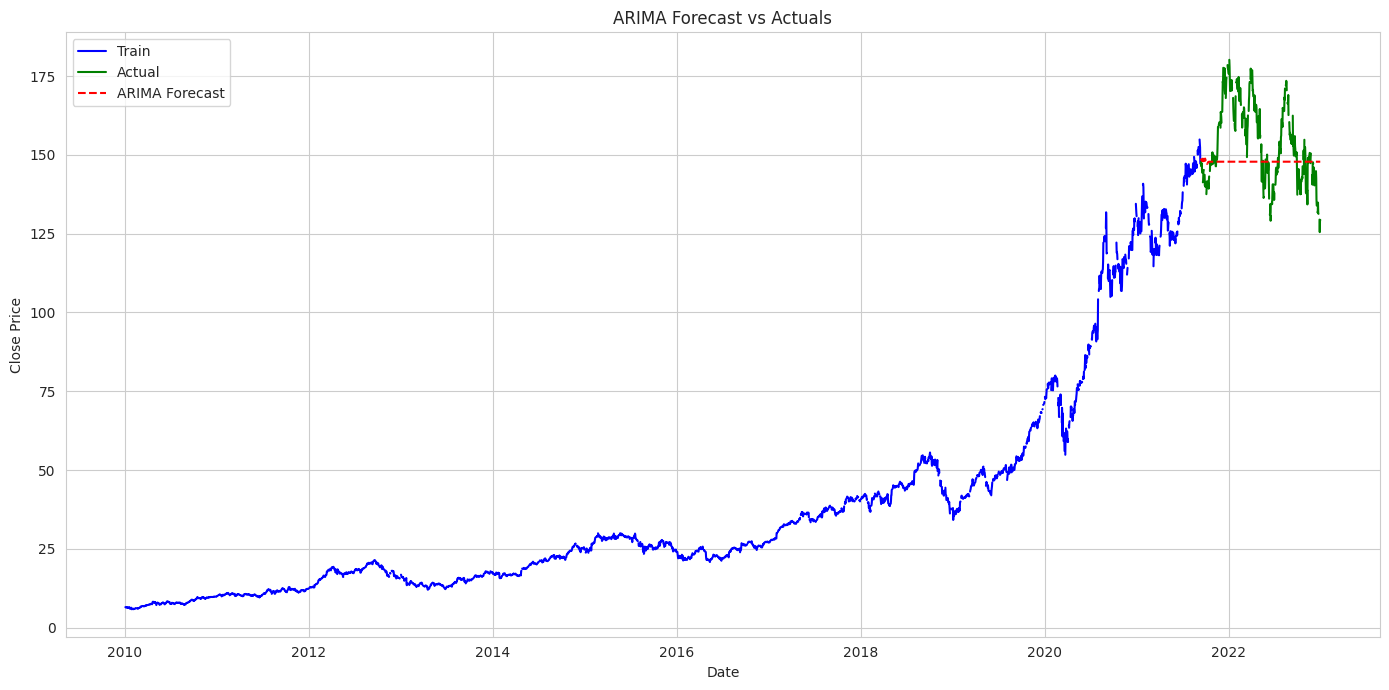

In [ ]:
# Forecast using the ARIMA model
forecast_steps = len(test)
arima_forecast = arima_result.get_forecast(steps=forecast_steps).predicted_mean

# Plotting the actual vs. forecasted values
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Train', color='blue')
plt.plot(test.index, test, label='Actual', color='green')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='red', linestyle='--')
plt.title('ARIMA Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()
plt.show()


The plot showcases the ARIMA model's forecast (in red dashed line) against the actual close prices (in green) for the test set. The blue line represents the training data.  

From the visual inspection:

The ARIMA model seems to capture the overall trend of the stock prices.
There are some deviations from the actual prices, especially during more volatile periods.  
To quantify the performance, let's calculate the Mean Absolute Percentage Error (MAPE) for the ARIMA model's forecasts. MAPE provides a percentage representation of the average absolute error between the forecasted and actual values.  

In [ ]:
# Adjust the index of the forecasted values to match the test set's index
arima_forecast.index = test.index

# Recalculate the Mean Absolute Percentage Error (MAPE)
mape_arima = ((abs(test - arima_forecast) / test) * 100).mean()

mape_arima

6.972790811760902

# LSTM Modeling
Data Preparation: LSTM models, being neural networks, require data to be scaled. We'll scale the data to the range [-1, 1]. Additionally, LSTM models take input in the form of [samples, time steps, features]. We'll reshape our data accordingly.  
Model Building: We'll design a simple LSTM architecture for our forecasting.
Training: We'll train our LSTM model on the training data.  
Forecasting & Evaluation: We'll use the model to forecast future values and then evaluate its performance.  
Let's start by scaling our data and preparing it for the LSTM model.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import LSTM
from keras.models import load_model
import keras
import h5py
import requests
import os

In [ ]:
apple_stock_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 00:00:00-05:00,6.469951,6.502387,6.438121,6.487533,493729600,0.0,0.0
2010-01-05 00:00:00-05:00,6.505420,6.535431,6.464495,6.498751,601904800,0.0,0.0
2010-01-06 00:00:00-05:00,6.498750,6.524518,6.388710,6.395379,552160000,0.0,0.0
2010-01-07 00:00:00-05:00,6.419024,6.426603,6.337176,6.383556,477131200,0.0,0.0
2010-01-08 00:00:00-05:00,6.375069,6.426603,6.337480,6.425996,447610800,0.0,0.0


In [ ]:
apple_stock_data.index = pd.DatetimeIndex(apple_stock_data.index)
apple_stock_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 00:00:00-05:00,6.469951,6.502387,6.438121,6.487533,493729600,0.0,0.0
2010-01-05 00:00:00-05:00,6.505420,6.535431,6.464495,6.498751,601904800,0.0,0.0
2010-01-06 00:00:00-05:00,6.498750,6.524518,6.388710,6.395379,552160000,0.0,0.0
2010-01-07 00:00:00-05:00,6.419024,6.426603,6.337176,6.383556,477131200,0.0,0.0
2010-01-08 00:00:00-05:00,6.375069,6.426603,6.337480,6.425996,447610800,0.0,0.0


In [ ]:
def normalize_data(df):
    min_max_scaler = preprocessing.MinMaxScaler()
    df['Open'] = min_max_scaler.fit_transform(df.Open.values.reshape(-1,1))
    df['High'] = min_max_scaler.fit_transform(df.High.values.reshape(-1,1))
    df['Low'] = min_max_scaler.fit_transform(df.Low.values.reshape(-1,1))
    df['Volume'] = min_max_scaler.fit_transform(df.Volume.values.reshape(-1,1))
    df['Close'] = min_max_scaler.fit_transform(df['Close'].values.reshape(-1,1))
    return df
df = normalize_data(apple_stock_data)
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 00:00:00-05:00,0.003649,0.003202,0.003910,0.003818,0.248420,0.0,0.0
2010-01-05 00:00:00-05:00,0.003851,0.003390,0.004064,0.003882,0.307026,0.0,0.0
2010-01-06 00:00:00-05:00,0.003813,0.003328,0.003622,0.003289,0.280076,0.0,0.0
2010-01-07 00:00:00-05:00,0.003358,0.002769,0.003322,0.003221,0.239427,0.0,0.0
2010-01-08 00:00:00-05:00,0.003106,0.002769,0.003324,0.003465,0.223434,0.0,0.0


In [ ]:
df = df.drop(columns= ['Dividends','Stock Splits'])
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04 00:00:00-05:00,0.003649,0.003202,0.003910,0.003818,0.248420
2010-01-05 00:00:00-05:00,0.003851,0.003390,0.004064,0.003882,0.307026
2010-01-06 00:00:00-05:00,0.003813,0.003328,0.003622,0.003289,0.280076
2010-01-07 00:00:00-05:00,0.003358,0.002769,0.003322,0.003221,0.239427
2010-01-08 00:00:00-05:00,0.003106,0.002769,0.003324,0.003465,0.223434


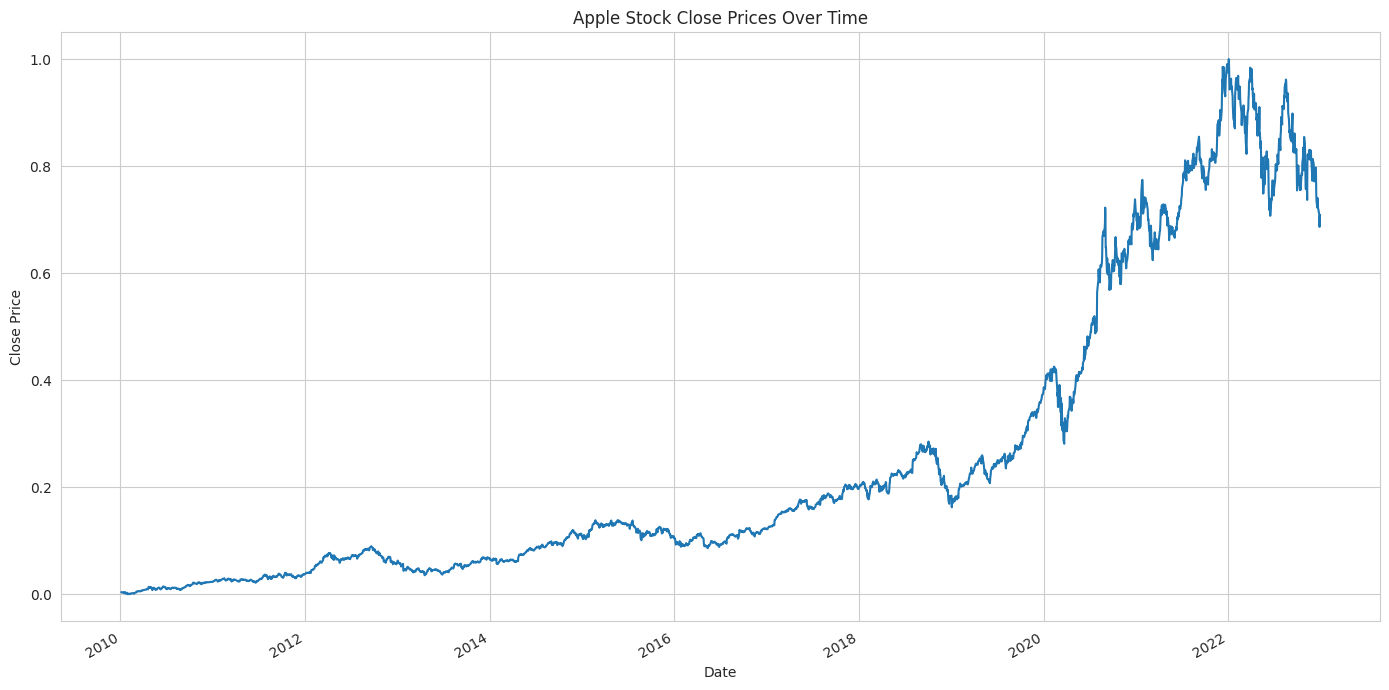

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Plotting the Close prices over time
plt.figure(figsize=(14, 7))
df['Close'].plot()
plt.title('Apple Stock Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.tight_layout()
plt.show()

In [ ]:

type(df['Close'])

pandas.core.series.Series

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

prices = apple_stock_data['Close'].values.reshape(-1, 1)

# Normalize the data to the [0, 1] range
scaler = MinMaxScaler()
prices = scaler.fit_transform(prices)

# Define the number of time steps and features
time_steps = 20  # You can experiment with this value
num_features = 1

# Create sequences and labels for training
X, y = [], []
for i in range(len(prices) - time_steps):
    X.append(prices[i:i+time_steps])
    y.append(prices[i+time_steps])

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(LSTM(256, input_shape=(time_steps, num_features), return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(256, return_sequences=False))
model.add(Dropout(0.3))

model.add(Dense(32,kernel_initializer="uniform",activation='relu'))
model.add(Dense(1,kernel_initializer="uniform",activation='linear'))

# adam = keras.optimizers.Adam(decay=0.2)

start = time.time()
model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
print("Compilation Time : ", time.time() - start)


Compilation Time :  0.021113157272338867


Epoch 1/100
41/41 [==============================] - 17s 293ms/step - loss: 0.0278 - accuracy: 7.6894e-04 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 2/100
41/41 [==============================] - 10s 247ms/step - loss: 0.0014 - accuracy: 7.6894e-04 - val_loss: 6.5974e-04 - val_accuracy: 0.0000e+00
Epoch 3/100
41/41 [==============================] - 11s 263ms/step - loss: 9.4992e-04 - accuracy: 7.6894e-04 - val_loss: 5.7563e-04 - val_accuracy: 0.0000e+00
Epoch 4/100
41/41 [==============================] - 11s 272ms/step - loss: 9.7761e-04 - accuracy: 7.6894e-04 - val_loss: 4.4977e-04 - val_accuracy: 0.0000e+00
Epoch 5/100
41/41 [==============================] - 11s 272ms/step - loss: 0.0012 - accuracy: 7.6894e-04 - val_loss: 0.0013 - val_accuracy: 0.0000e+00
Epoch 6/100
41/41 [==============================] - 11s 272ms/step - loss: 0.0012 - accuracy: 7.6894e-04 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 7/100
41/41 [==============================] - 11s 272ms/step 

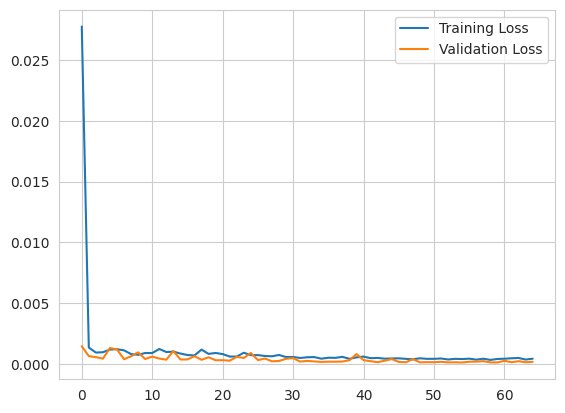

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
df.shape

(3272, 5)

21/21 [==============================] - 1s 46ms/step
Mean Squared Error: 0.00013579089861941735


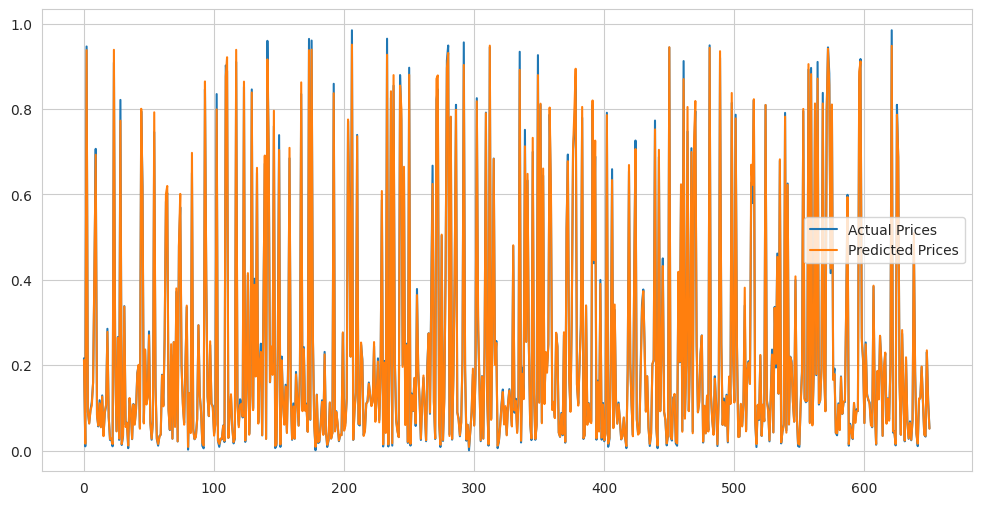

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

apple_stock_data = apple_stock_data['Close'].values.reshape(-1,1)
y_pred = y_pred.reshape(-1,1)
y_test = y_test.reshape(-1,1)

# Inverse transform the predictions to the original scale
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Evaluate the model (you can use different evaluation metrics)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualize predictions vs. actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.legend()
plt.show()

# Visualise Results

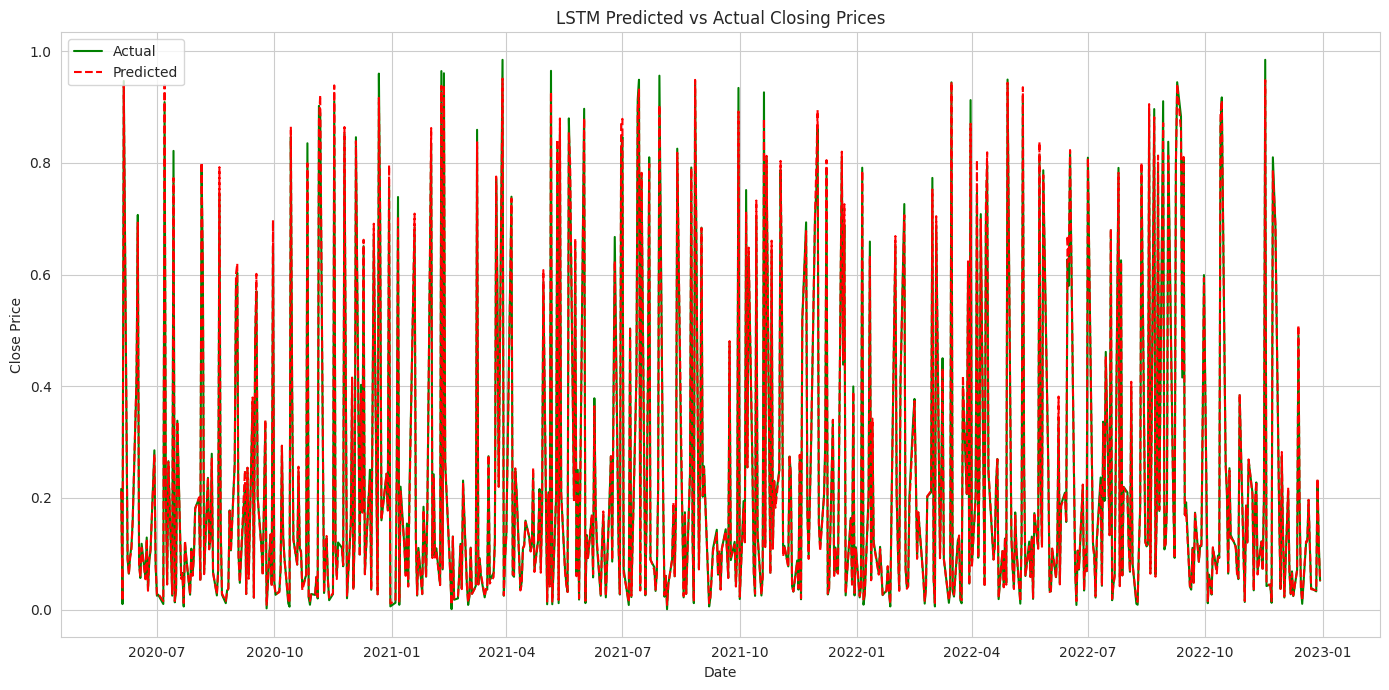

In [ ]:
import matplotlib.pyplot as plt

# Plotting the actual vs. predicted closing prices
plt.figure(figsize=(14, 7))
plt.plot(apple_stock_data.index[-len(y_test):], scaler.inverse_transform(y_test), label='Actual', color='green')
plt.plot(apple_stock_data.index[-len(y_test):], y_pred, label='Predicted', color='red', linestyle='--')
plt.title('LSTM Predicted vs Actual Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()
plt.show()
